# Capítulo 1  Limpeza e tratamento de dados.

Este notebook é um resumo do conteúdo do livro: Projetos de Ciência de dados com Python: Uma abordagem de estudo de caso para a criação de projetos de dados bem-sucedidos usando python, pandas e scikit-learn.

Pode ser adiquirido através do link:

https://www.amazon.com.br/Projetos-Ciência-Dados-Python-Bem-sucedidos/dp/6586057108/ref=asc_df_6586057108/


## Diferentes problemas enfrentados na ciência de Dados

Otimização.

Inferência estatística.

Modelagem de Séries Temporais.

Problemas de matematíca aplicada em geral.
 
### Aprendizado supervisionado
 
__Problemas de Regressão__

Previsões de dados numéricos em escalas discretas ou contínuas.

__Problemas de classificação__

Previsões de dados categoricos ou classificatórios.


### Carregando dados  do estudo de caso

In [63]:
import pandas as pd
import numpy as np

df = pd.read_excel('data01.xls')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [64]:
# retorna o número de linhas e colunas
df.shape

(30000, 25)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

### Estudo de caso: Dados de uma epresa de cartão de créditos

Amostra: 30.000 Titulares de Contas.\
(uma linha para cada conta -  a definição das linhas devem ser claras e objetivas)

O cliente é uma empresa de cartão de crédito.

O dataset possui dados demográficos e financeiros.

__*Objetivo: Desenvolvimento de um modelo que preveja se uma conta ficará inadimplente no próximo mês, de acordo com os dados demográficos e historicos*.__

### Etapas da exploração de dados:

O objetivo da exploração de dados é a utilização de técnicas numéricas e/ou gráficas, e verificar de as suas informações fazem sentido e correspondem ao cenário avalidado.\
Etapas:\
**1** - Identificação do número de linhas(amostras) e colunas(caracteristicas)\
**2** - Identificação do tipo das caracteristicas: categoricas ou numéricas.\
**3** - Identificação da ausência de dados, valores atípicos, valores nulos, valors faltando, entre outros...

### Verificando a integridade básica dos dados


In [66]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

 __ID__: identificação de contas de usuários\
 __LIMIT_BAL__: Valor do crédito fornecido\
 __SEX__: Gênero 1 = masculino 2 = feminino\
 __Não é usual tomar considerações e decisões de solvibilidade levando em consideração o gênero__\
 __EDUCATION__: Instrução 1 = pós graduação 2 = universidade 3 = ensimo médio 4 = outros
 __MARRIEAGE__: Estado Civil 1 = casado 2 = solteiros 3 = outros
 __AGE__: Idade\
 __PAY_1 ... PAY_6__: Registro de pagamentos passados. Pagamentos mensais passados, registrados de abril a setembro, são armazenados nessas colunas.\
 PAY_1 representa o status de reembolso em setembro. PaY_2 representa o statusde pagamamento em agosto, e assim por diante até PAY_6, que representa o status de reembolso em abril.\
 A escala de medida do status de reembolso é a seguinte: -1 = pagamento pontual; 1 = atraso de um mês no pagamento; 2 = atraso de dois meses no pagamento; e assim por diante até 8 = atraso de oito meses no pagamento; 9 = atraso de nove meses ou mais no pagamento\
__BILL_AMT1 - BILL_AMT6__: Valor da fatura\
BILL_AMT1 representa o valor da fatura em setembro; BILL_AMT2 representa o valor da fatura em agosto; e assim por diante até BILL_AMT6, que representa o valor da fatura em abril.\
__PAY_AMT1 - PAY_AMT6__: Valor de pagamentos anteriores.\
PAY_AMT1 representa o valor pago em setembro, PAY_AMT2 representa o valor pago em agosto, e assim por diante até PAY_AMT6, que representa o valor pago em abril.

In [67]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [68]:
# verificação de identificadores exclusivos
# Podemos contar o número de valores exclusivos usando o método .nunique() na serie (ou seja, coluna) ID
df['ID'].nunique()
# nota-se que temos 29.687 entradas exclusivas

29687

In [69]:
df.shape

(30000, 25)

In [70]:
# identificaçoes que o número de IDS exclusivos é menor do que o número de linhas.
# isso significa que o id não é um identificador exclusivo para as linhas de dados.
# podemos concluir que existe uma duplicação de IDs.Em que quantidade ?
# um único ID está sendo duplicado várias vezes ? Quantos IDs estão sendo duplicados?
# podemos utilizar o método . value_counts() na série ID para começar a responder a essas perguntas.
# esse método listará os IDs exclusivos e a frequência com que ocorrem.

id_counts = df['ID'].value_counts()
id_counts


5f463f95-a4ae    2
4a051fdc-d04c    2
062f1fe4-9a66    2
fd6033f4-cc72    2
7fe414ae-32f8    2
                ..
074a3d57-182e    1
17377bf4-9b15    1
35ec429d-7f7d    1
12112709-c96f    1
55e000ad-216c    1
Name: ID, Length: 29687, dtype: int64

In [71]:
# exibe o número de entradas duplicadas agrupadas executando outra contagem de valores

id_counts.value_counts()

# Podemos observar que a maioria dos IDS ocorre exatamente uma única vez, no entanto, 313 IDs ocorrem duas vezes.
# nenhum ID ocorre mais que duas vezes.

1    29374
2      313
Name: ID, dtype: int64

In [72]:
# usando mascaras e arrays booleanos podemos examinar alguns dos IDs duplicados descobertos
# sabemos que nenhum ID aparece mais de duas vezes, podemos usar essa informação para localiza-los e trata-los.

dupe_mask = id_counts == 2 # n=mascara booleana
dupe_mask[0:5]

5f463f95-a4ae    True
4a051fdc-d04c    True
062f1fe4-9a66    True
fd6033f4-cc72    True
7fe414ae-32f8    True
Name: ID, dtype: bool

In [73]:
# usando a máscara logica para selecionaros IDs que estão duplicados.
id_counts.index[0:5]

Index(['5f463f95-a4ae', '4a051fdc-d04c', '062f1fe4-9a66', 'fd6033f4-cc72',
       '7fe414ae-32f8'],
      dtype='object')

In [74]:
# armazena os IDS duplicados em uma nova variável 
dupe_ids = id_counts.index[dupe_mask]
type(dupe_ids)


pandas.core.indexes.base.Index

In [75]:
#converte dupe_ids em uma lista 
dupe_ids = list(dupe_ids)
len(dupe_ids)
type(dupe_ids)

list

In [76]:
dupe_ids[0:5]

['5f463f95-a4ae',
 '4a051fdc-d04c',
 '062f1fe4-9a66',
 'fd6033f4-cc72',
 '7fe414ae-32f8']

Verificação da existância de algo diferente entre as entradas duplicadas.

In [77]:
df.loc[df['ID'].isin(dupe_ids[0:3:])].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
9384,062f1fe4-9a66,10000,1,2,2,26,Not available,4,3,2,...,8660,8840,9472,0,0,0,468,929,0,0
9484,062f1fe4-9a66,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20651,5f463f95-a4ae,30000,1,2,1,22,1,2,5,4,...,27120,26154,25940,4311,0,0,0,0,0,1
20751,5f463f95-a4ae,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21056,4a051fdc-d04c,100000,1,1,2,34,0,0,2,2,...,26839,26109,27686,7100,0,3000,0,2000,0,1
21156,4a051fdc-d04c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Podemos observar  que o dataframe dos  IDs duplicados porssuem uma linha com valores validos.\
e outra linha com valores iguais a zero.\

Criando uma matriz booleana
<p>
   
</p>

In [78]:
df_zero_mask= df == 0
df_zero_mask

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [79]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
type(feature_zero_mask)

pandas.core.series.Series

In [80]:
sum(feature_zero_mask)

315

In [81]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy() # ~ operador logico not
# verificação se o numero de linhas restantes é igual ao número de IDs exclusivos
df_clean_1.shape

(29685, 25)

In [82]:
# obtendo o número de Ids exclusivos
df_clean_1['ID'].nunique()

29685

### Explorando e limpando os dados

In [83]:
df_clean_1.info()
# 25 colunas
# cada linha possuindo 29685 valores não nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [84]:
df_clean_1['PAY_1'].head(5) # podemos observar a presença de valores 0, não correspondentes com a informação da coluna
# -1 = pagamento pontual, 1 = atraso de um mês... 9 = atraso de nove meses de pagamento

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [85]:
df_clean_1['PAY_1'].value_counts()
# a saída abaixo revela a presença de dois valores não  correspondentes, sendo eles 0 e -2
# a saída também releva a presença de valores com a strings'Not avaliable' 

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [86]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available' # diferente de
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [87]:
# verifica quantas linhas não têm dados ausentes calculando a soma da máscara:
sum(valid_pay_1_mask)
# observa-se que 26664 não tem o valor 'Not available'

26664

In [88]:
# limpa os dados aliminando as linhas PAY_1 com valores ausentes
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
df_clean_2.shape # verifica se o data frame possui a dimensão esperada

(26664, 25)

In [89]:
# também podemos conferir a dimensão desta forma
df_clean_2['PAY_1'].value_counts()
# nota-se que não há a presença de Not availabel

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [90]:
type(df_clean_2)

pandas.core.frame.DataFrame

In [91]:
df_clean_2[['PAY_1']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PAY_1   26664 non-null  object
dtypes: object(1)
memory usage: 416.6+ KB


In [92]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1','PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


__Novas informações a respeito da base de dados__
-2 significa que a conta começou o mês sem valor a ser pago e o crédito não foi usado.
-1 significa que a conta usou um valor que foi totalmente pago
 0 significa que o pagamento mínimo foi feito,mas o saldo total do devedor não foi pago

### Exploração e garantia da qualidade dos dados
#### Explorando o limite de crédito e as características demográficas

Etapas
Exploração de dados com limite de crédito e as características etárias.
Visualização e sinteses estatísticas para averiguar se as informações e caracteristicas dos dados são aceitaveis.
Ánalise das caracteristicas categóricas de instrução e estado civil para posssível correção.
Utilização de histogramas para visualização de determinadas características.

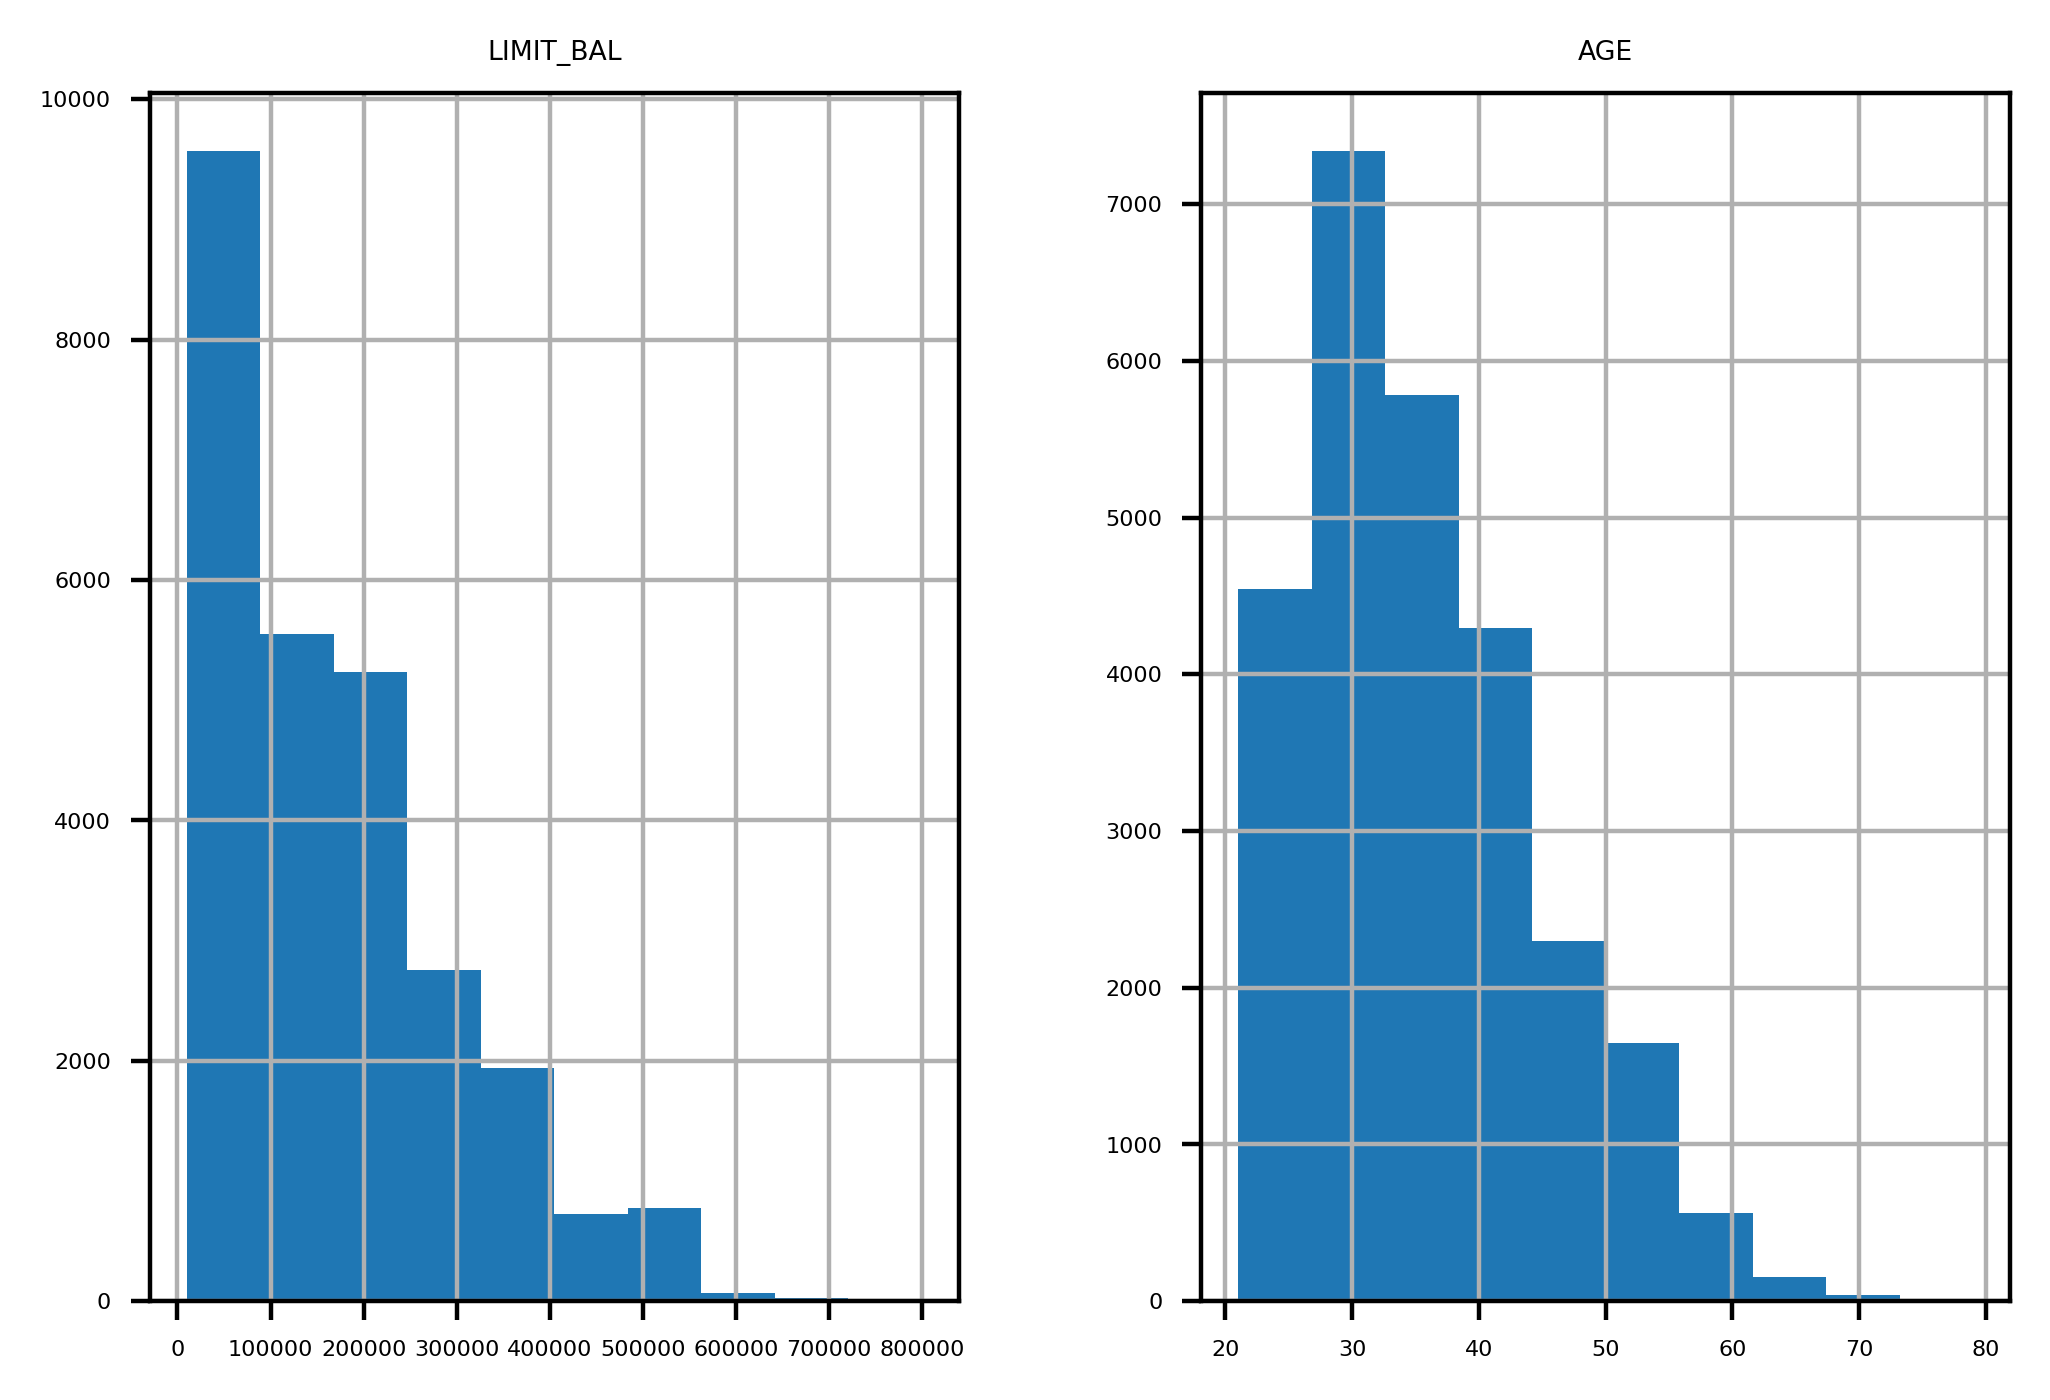

In [93]:
import matplotlib.pyplot as plt 
 #renderiza automaticamente
import matplotlib as mpl # recurso adicional de plotagem
mpl.rcParams['figure.dpi']= 400 # figuras em alta resolução

df_clean_2[['LIMIT_BAL', 'AGE']].hist();

In [94]:
# Relatório com síntese estatística 
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [95]:
df_clean_2['EDUCATION'].value_counts()
#1= pós-graduação, 2= graduação, 3 = ensino médio, 4 outros
# os outros graus não são conhecidos ou predominantes, por isso podemos agrupa-las em outros

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [96]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value = 4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [97]:
# contagem dos valores da caracteristica MARRIAGE
df_clean_2['MARRIAGE'].value_counts()
# 1 = casado, 2= solteiros, 3 = outros
# mesmo problema identidicado com education, onde existe um valor não correspondente
# agruparemos

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [98]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

### Aprofundamento nas  características categóticas

Os algoritimos de machine learning só funcionam com números, precisamos converter valores categóricos em valores núméricos caso precisemos aplicar os algoritmos nesse tipo de valores.

### Implementando uma característica categórica
Fazendo de maneira contrária, criando uma columa de strings:\
1 = graduate school 2 = university 3 = ensimo médio 4 = others

In [99]:
# cria uma coluna vazia para 
df_clean_2['EDUCATION_CAT'] = 'none'
df_clean_2[['EDUCATION','EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [100]:
cat_mapping = {
    1:'graduate school',
    2:'university',
    3:'high school',
    4:'others',
}
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [101]:
# aplicando one-hot-enconding
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [102]:
# Concatenando os data frames para conferencia
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis = 1)
df_with_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [103]:
df_with_ohe.to_csv('chapter_1_cleaned_data.csv', index = False)

#### Explorando as características de histórico financeiro do dataset

In [104]:
df = pd.read_csv('chapter_1_cleaned_data.csv')
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
5,ceae2946-47e4,50000,1,1,2,37,0,0,0,0,...,657,1000,1000,800,0,graduate school,1,0,0,0
6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,0,...,38000,20239,13750,13770,0,graduate school,1,0,0,0
7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,0,...,0,581,1687,1542,0,university,0,0,0,1
8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,0,...,432,1000,1000,1000,0,high school,0,1,0,0
9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,1122,0,0,high school,0,1,0,0


In [105]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [106]:
df.shape

(26664, 30)

In [107]:
# relacionando as caracteristicas desejadas e uma lista para serem análisadas em conjunto
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[pay_feats].describe()


,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [108]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

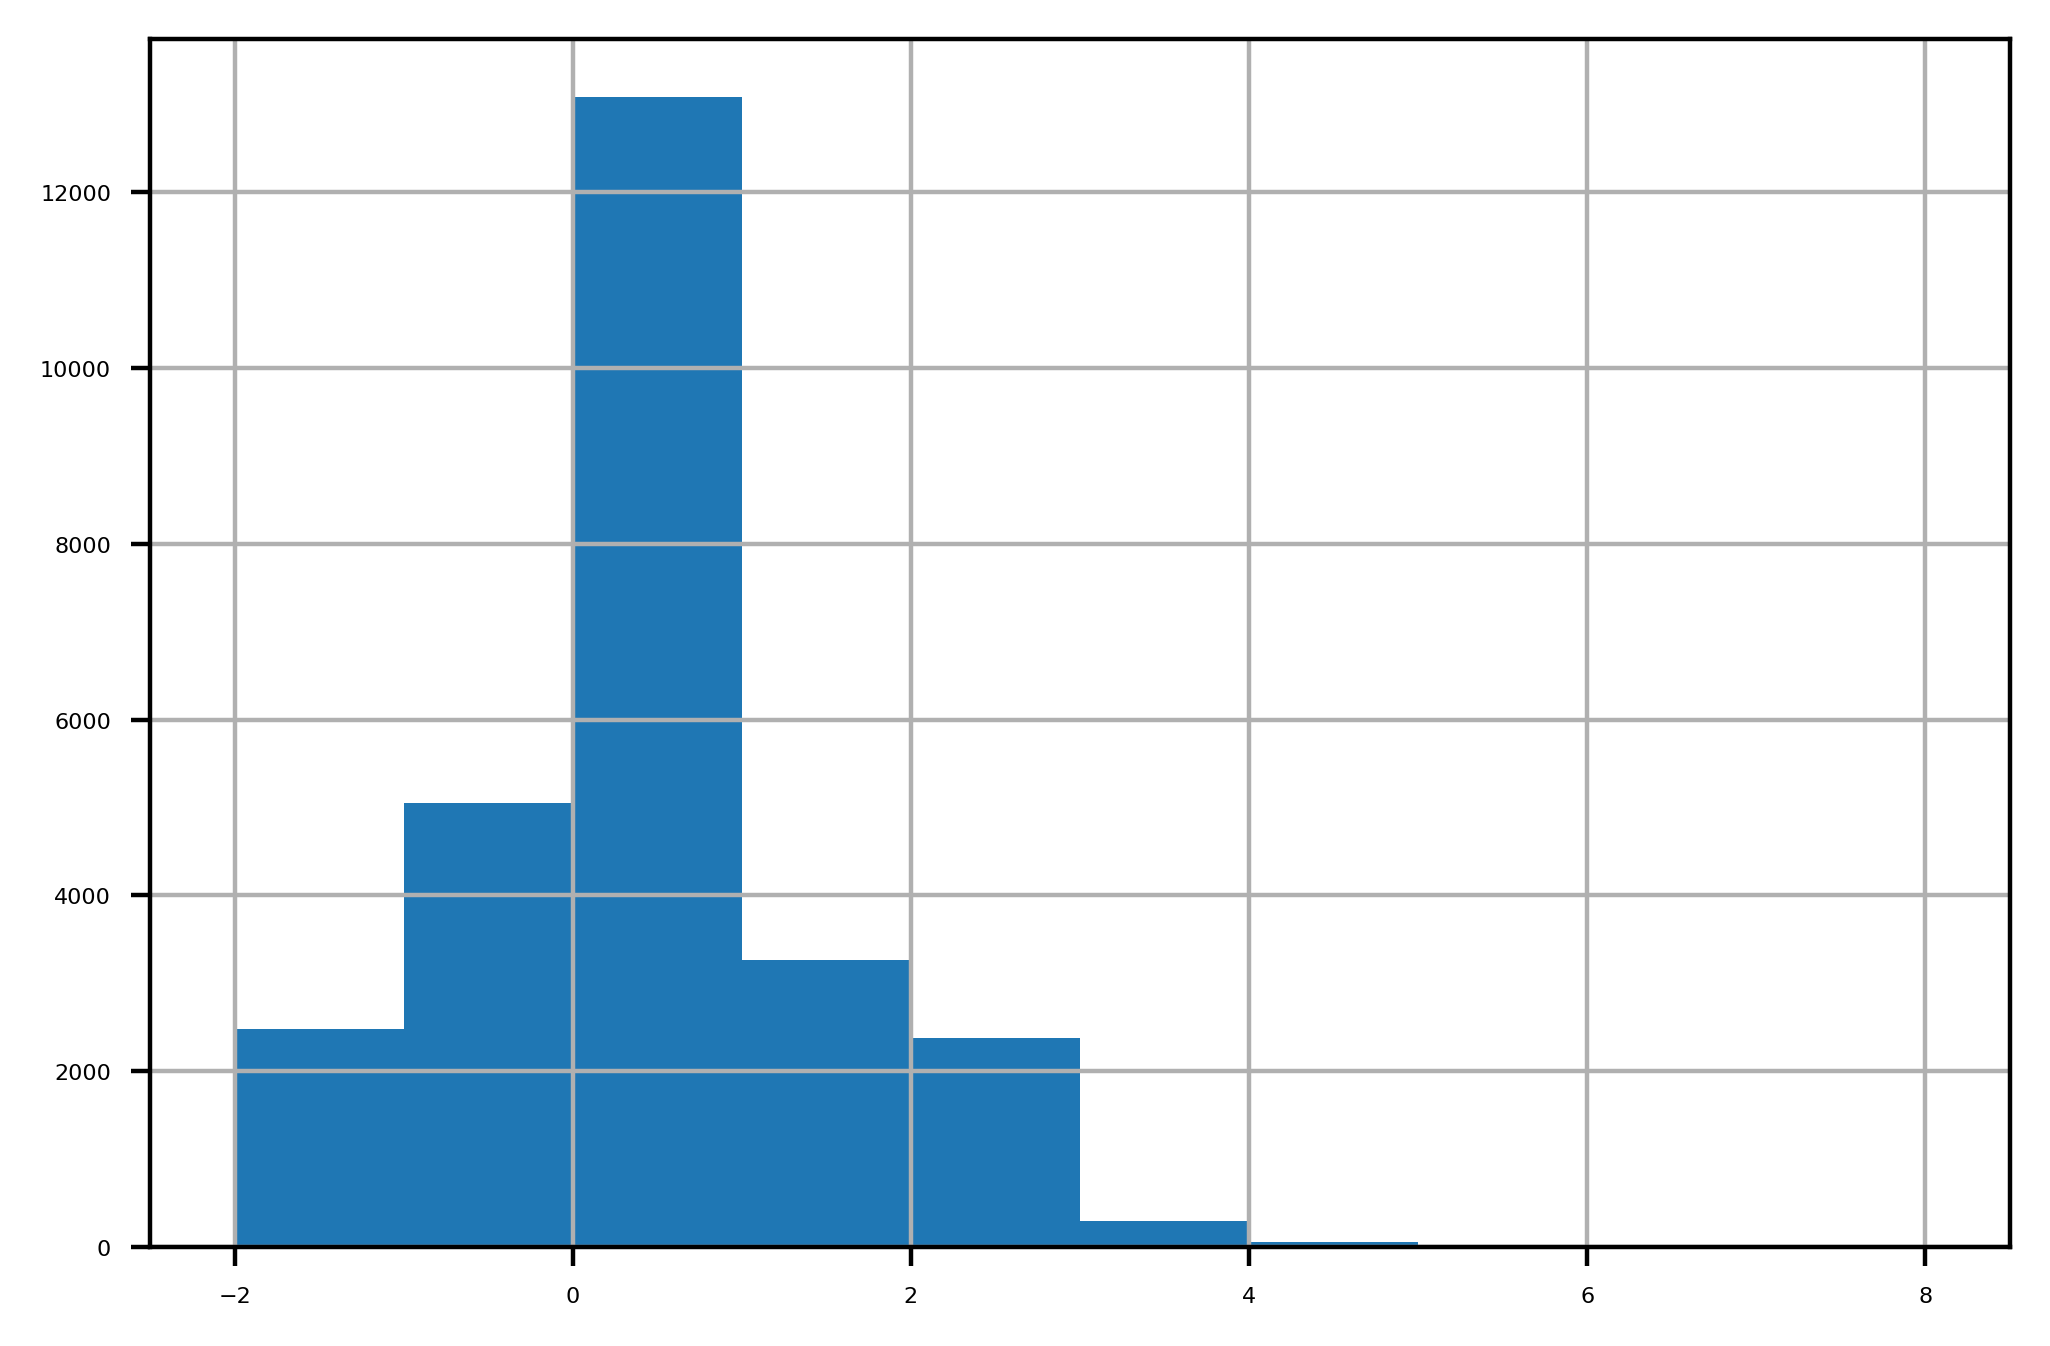

In [109]:
df[pay_feats[0]].hist();

#### Considerações importantes no cálculo e na plotagem de histogramas.
__Bins__
O número de barras verticais com valores agrupados que compõem a plotagem de um histogram é chamdo de bin.
O número padrão de bins é 10.
Quando o número de valores exclusivos for próximo ao número de bins, é recomendavel a definição manual do número de bins do histograma, para que seja igual ao número de valores exclusivos.

__Borda_dos_bins__

As bordas dos bins determinam como os valores foram agrupados. Fazendo alusão aos intervalos da reta númerica,  a borda esquerda é fechada, e a borda direita é a aberta, com exceção do último bin que possui ambas bordas fechadas.

In [110]:
pay_1_bins = np.array(range(-2,10))-0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

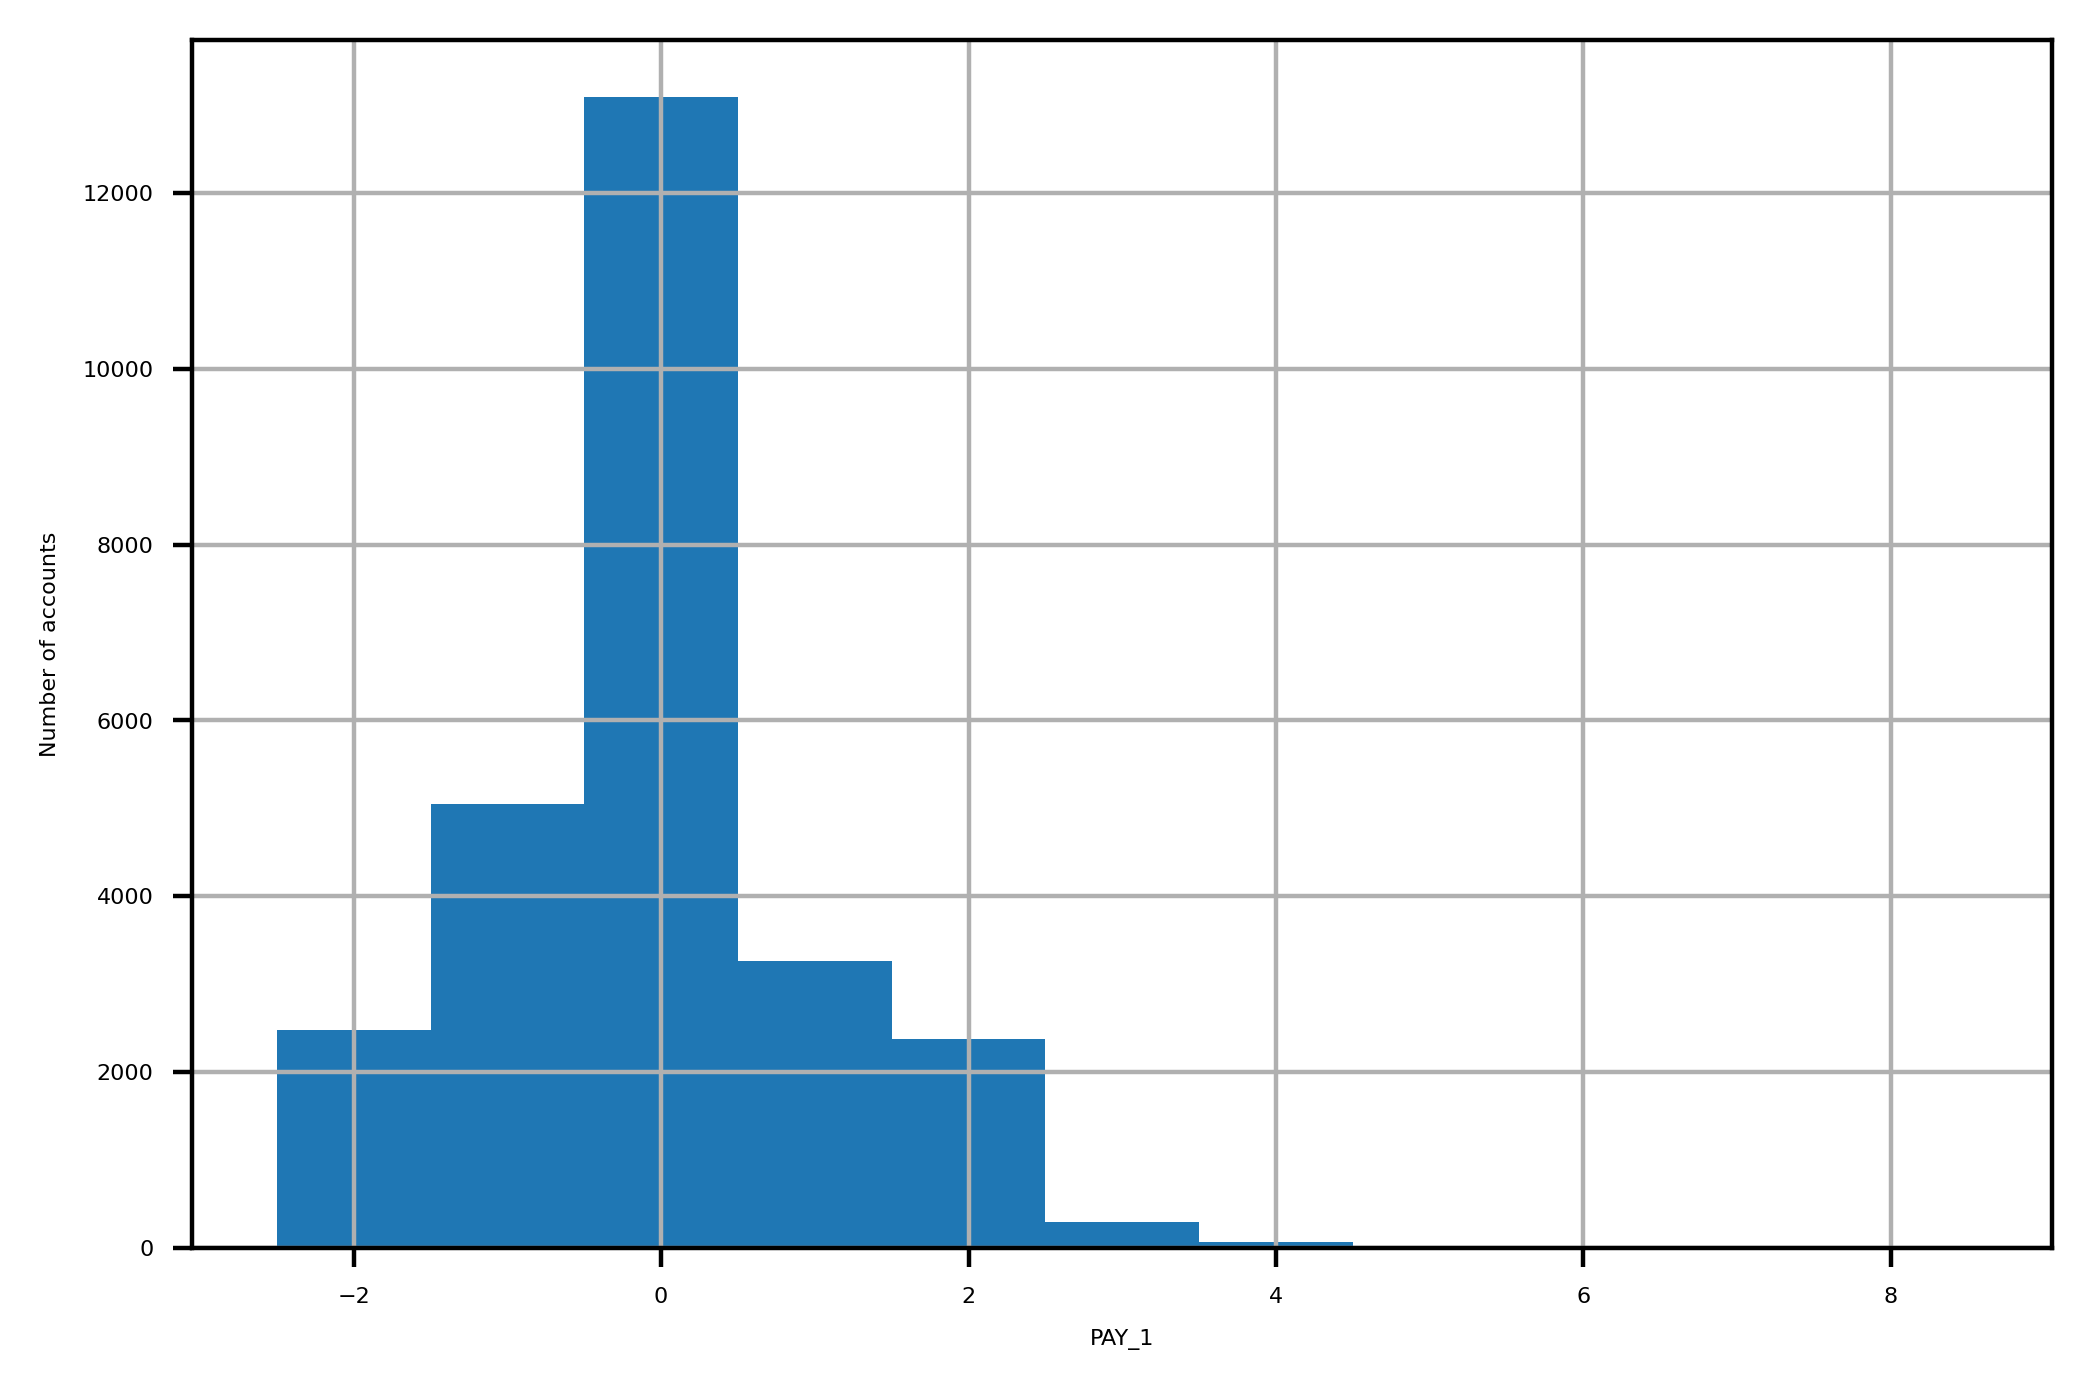

In [111]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

'\nObservando os histogramas, percebemos que há uma inconsistência nos dados.\nEm julho(PAY_3), poucas contas tiveveram atraso de um mês no pagamento, não exixstindo barra de pagamentos no histograma.\nEm agosto (PAY_2) há milhares de contas com atraso de 2 meses, isso não faz sentido: o número de contas com atraso de 2 \nmeses em um mês específico deveria ser menor ou igual ao número de contas de  atraso de 1 mês no mês anterior.\n'

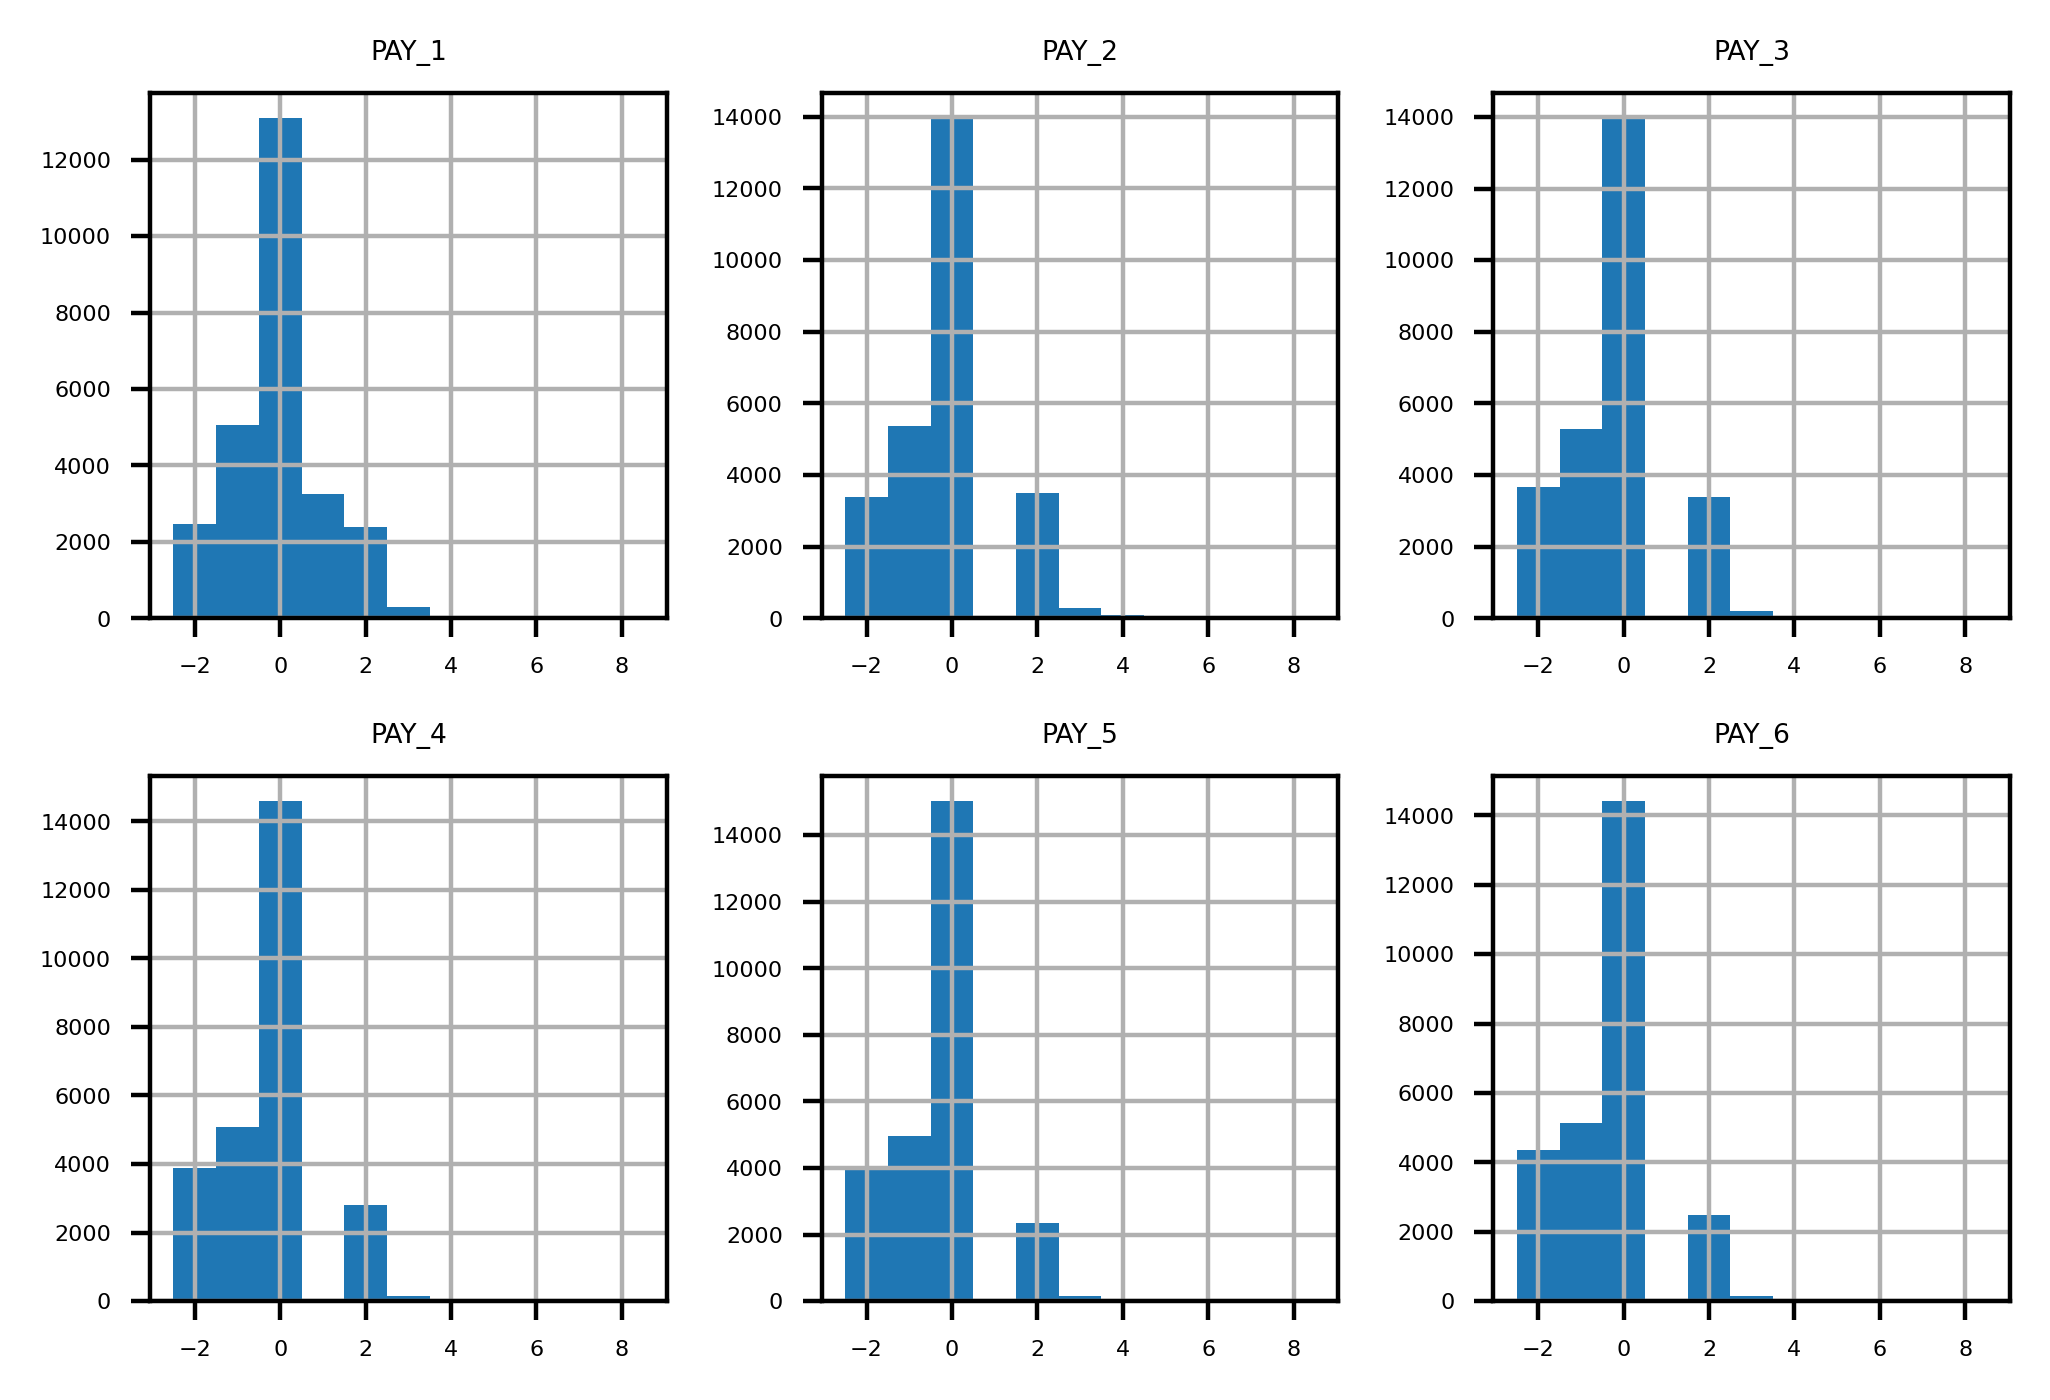

In [112]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3)); # pay feats é uma lista

# pay_feats = ['pay_1', 'Pay2',...'Pay_6']
# pay_1_bins 

"""
Observando os histogramas, percebemos que há uma inconsistência nos dados.
Em julho(PAY_3), poucas contas tiveveram atraso de um mês no pagamento, não exixstindo barra de pagamentos no histograma.
Em agosto (PAY_2) há milhares de contas com atraso de 2 meses, isso não faz sentido: o número de contas com atraso de 2 
meses em um mês específico deveria ser menor ou igual ao número de contas de  atraso de 1 mês no mês anterior.
"""

In [113]:
df.loc[df['PAY_2']==2,['PAY_2', 'PAY_3']].head()

# Observando o dataset abaixo, podemos observar a presença de valores inconsistentes em PAY_2
# Na linha 0 por exemplo: Como podemos ter um atraso de 2 meses em agosto (PAY_2), sendo que temos
# registro de pagamento (-1 )em julho PAY_3.
# observando os histogramas acima, podemos notar que somente PAY_1 esta correto, e é representativo de dados futuros
# aqueles que serão usados para se fazer previsões através de modelos 

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


### Explorando  as características financeiras restantes do datase

__1- Crie listas com nomes para as características financeiras restantes.__

In [119]:
bill_feats= ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']

__2- Use describe() para examinar as sínteses estatísticas das características de valor da fatura.__

In [115]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


__3- Visualize as características de valor da fatura usando uma grade 2x3 de plotagens de histograma.__

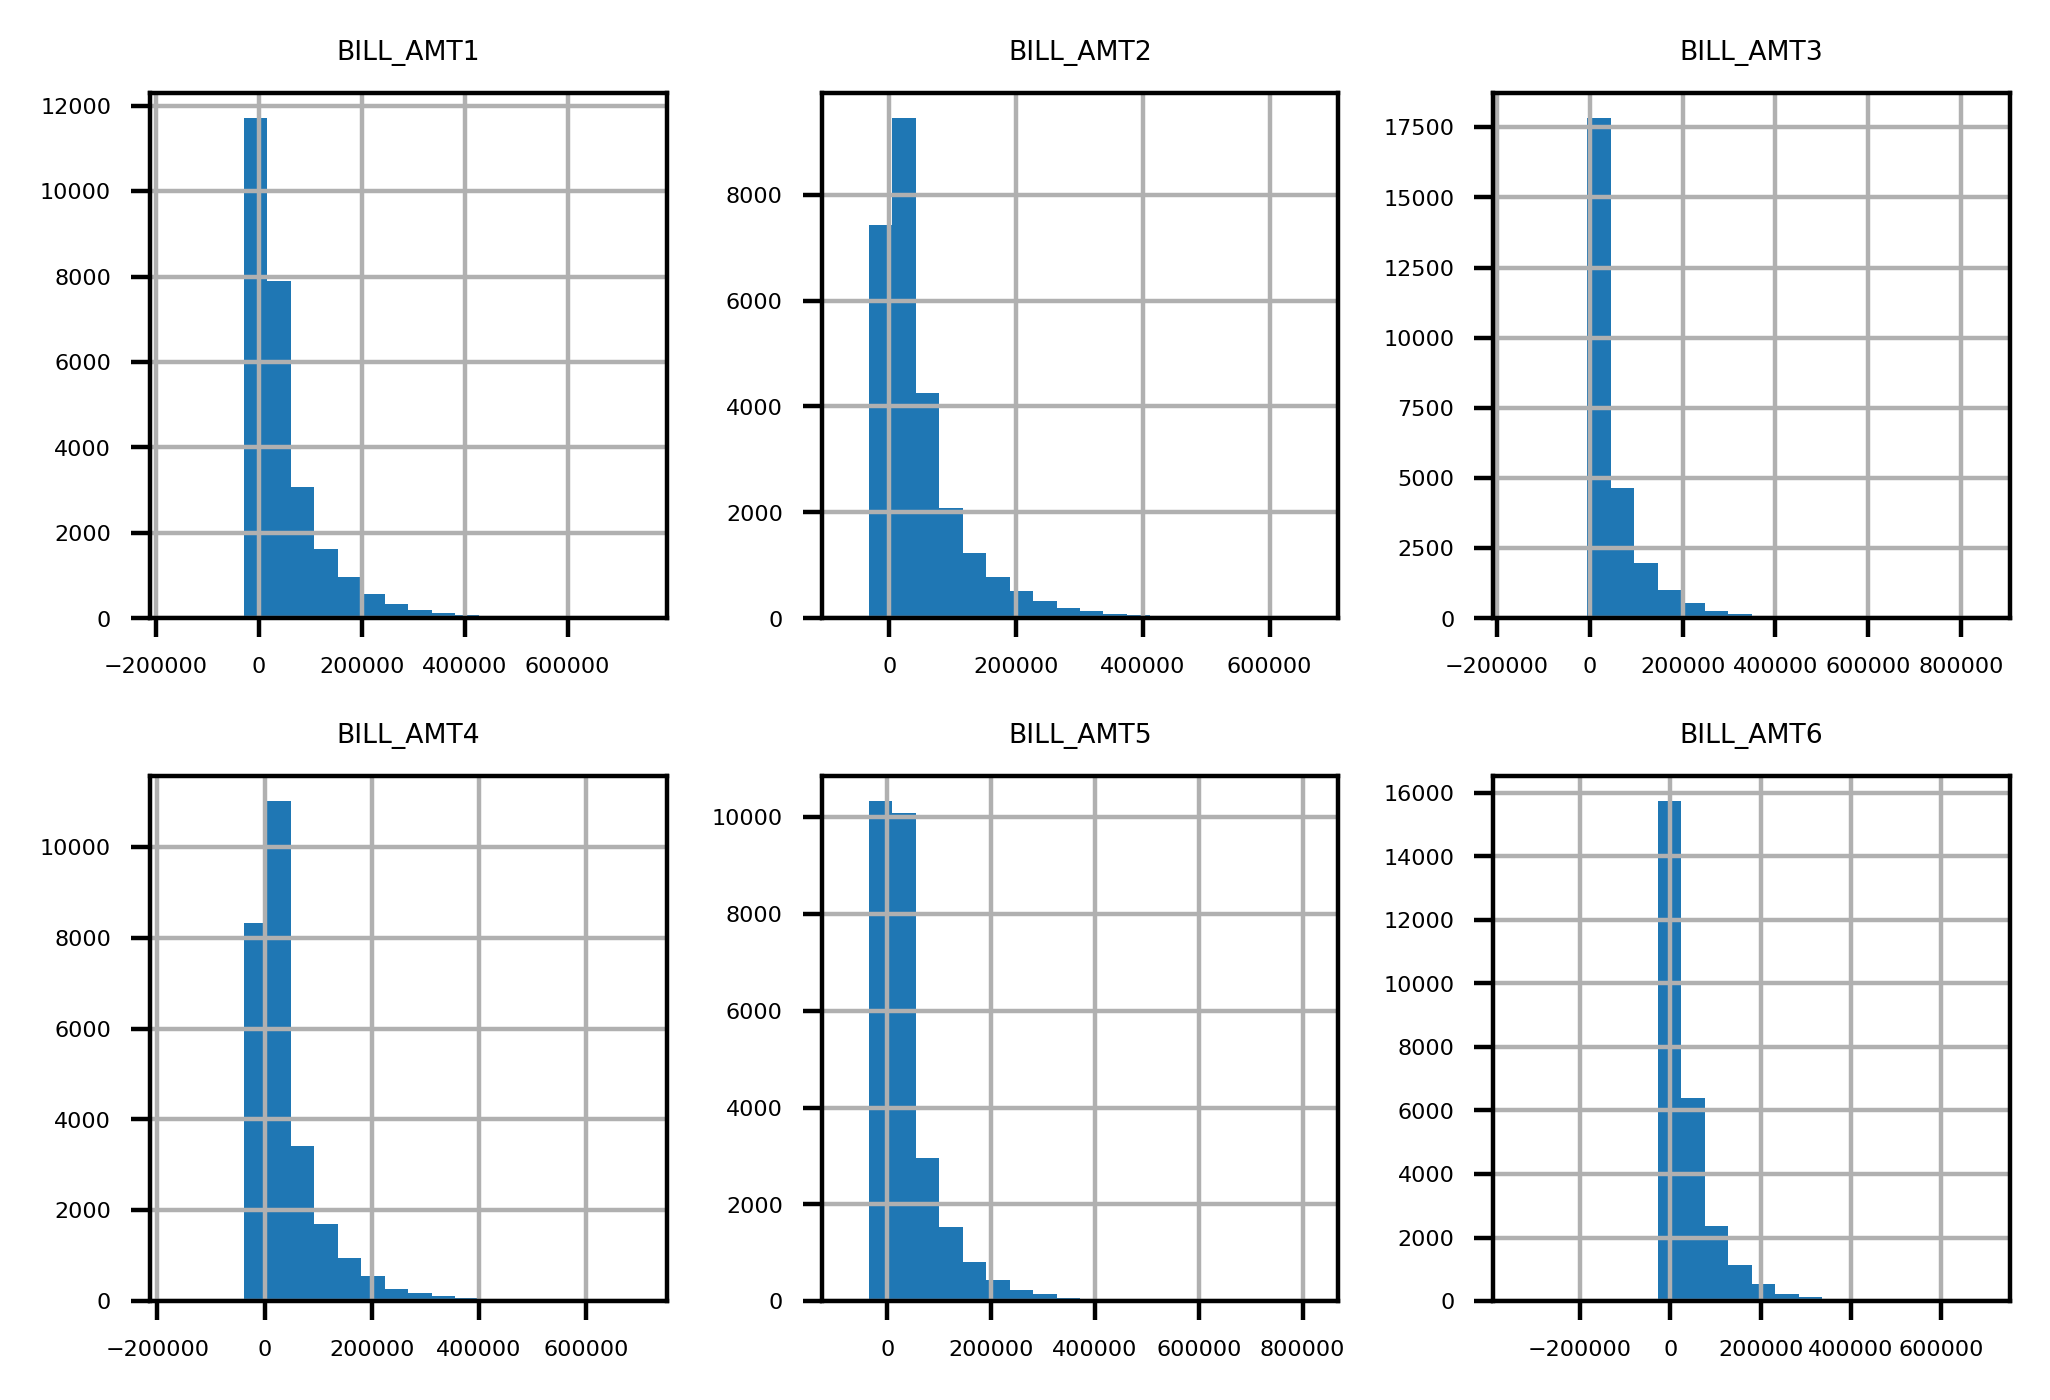

In [116]:
df[bill_feats].hist(bins=20, layout=(2,3));

__4 - Obtenha o resumo de .describe() para as características de valor de pagamento.__

In [120]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


__5 - Plote um histograma das características de pagamento da fatura semelhante ao das características de valor da fatura, mas aplique também alguma rotação aos rótulos do eixo x  com o argumento de palavra-chave xrot para que eles  não se sobreponham. Podemos incluir o argumento de palavra-chave xrot=<ângulo> em qualquer função de plotagem para girar os rótulos do eixo x de acordo com um ângulo específico em graus.__

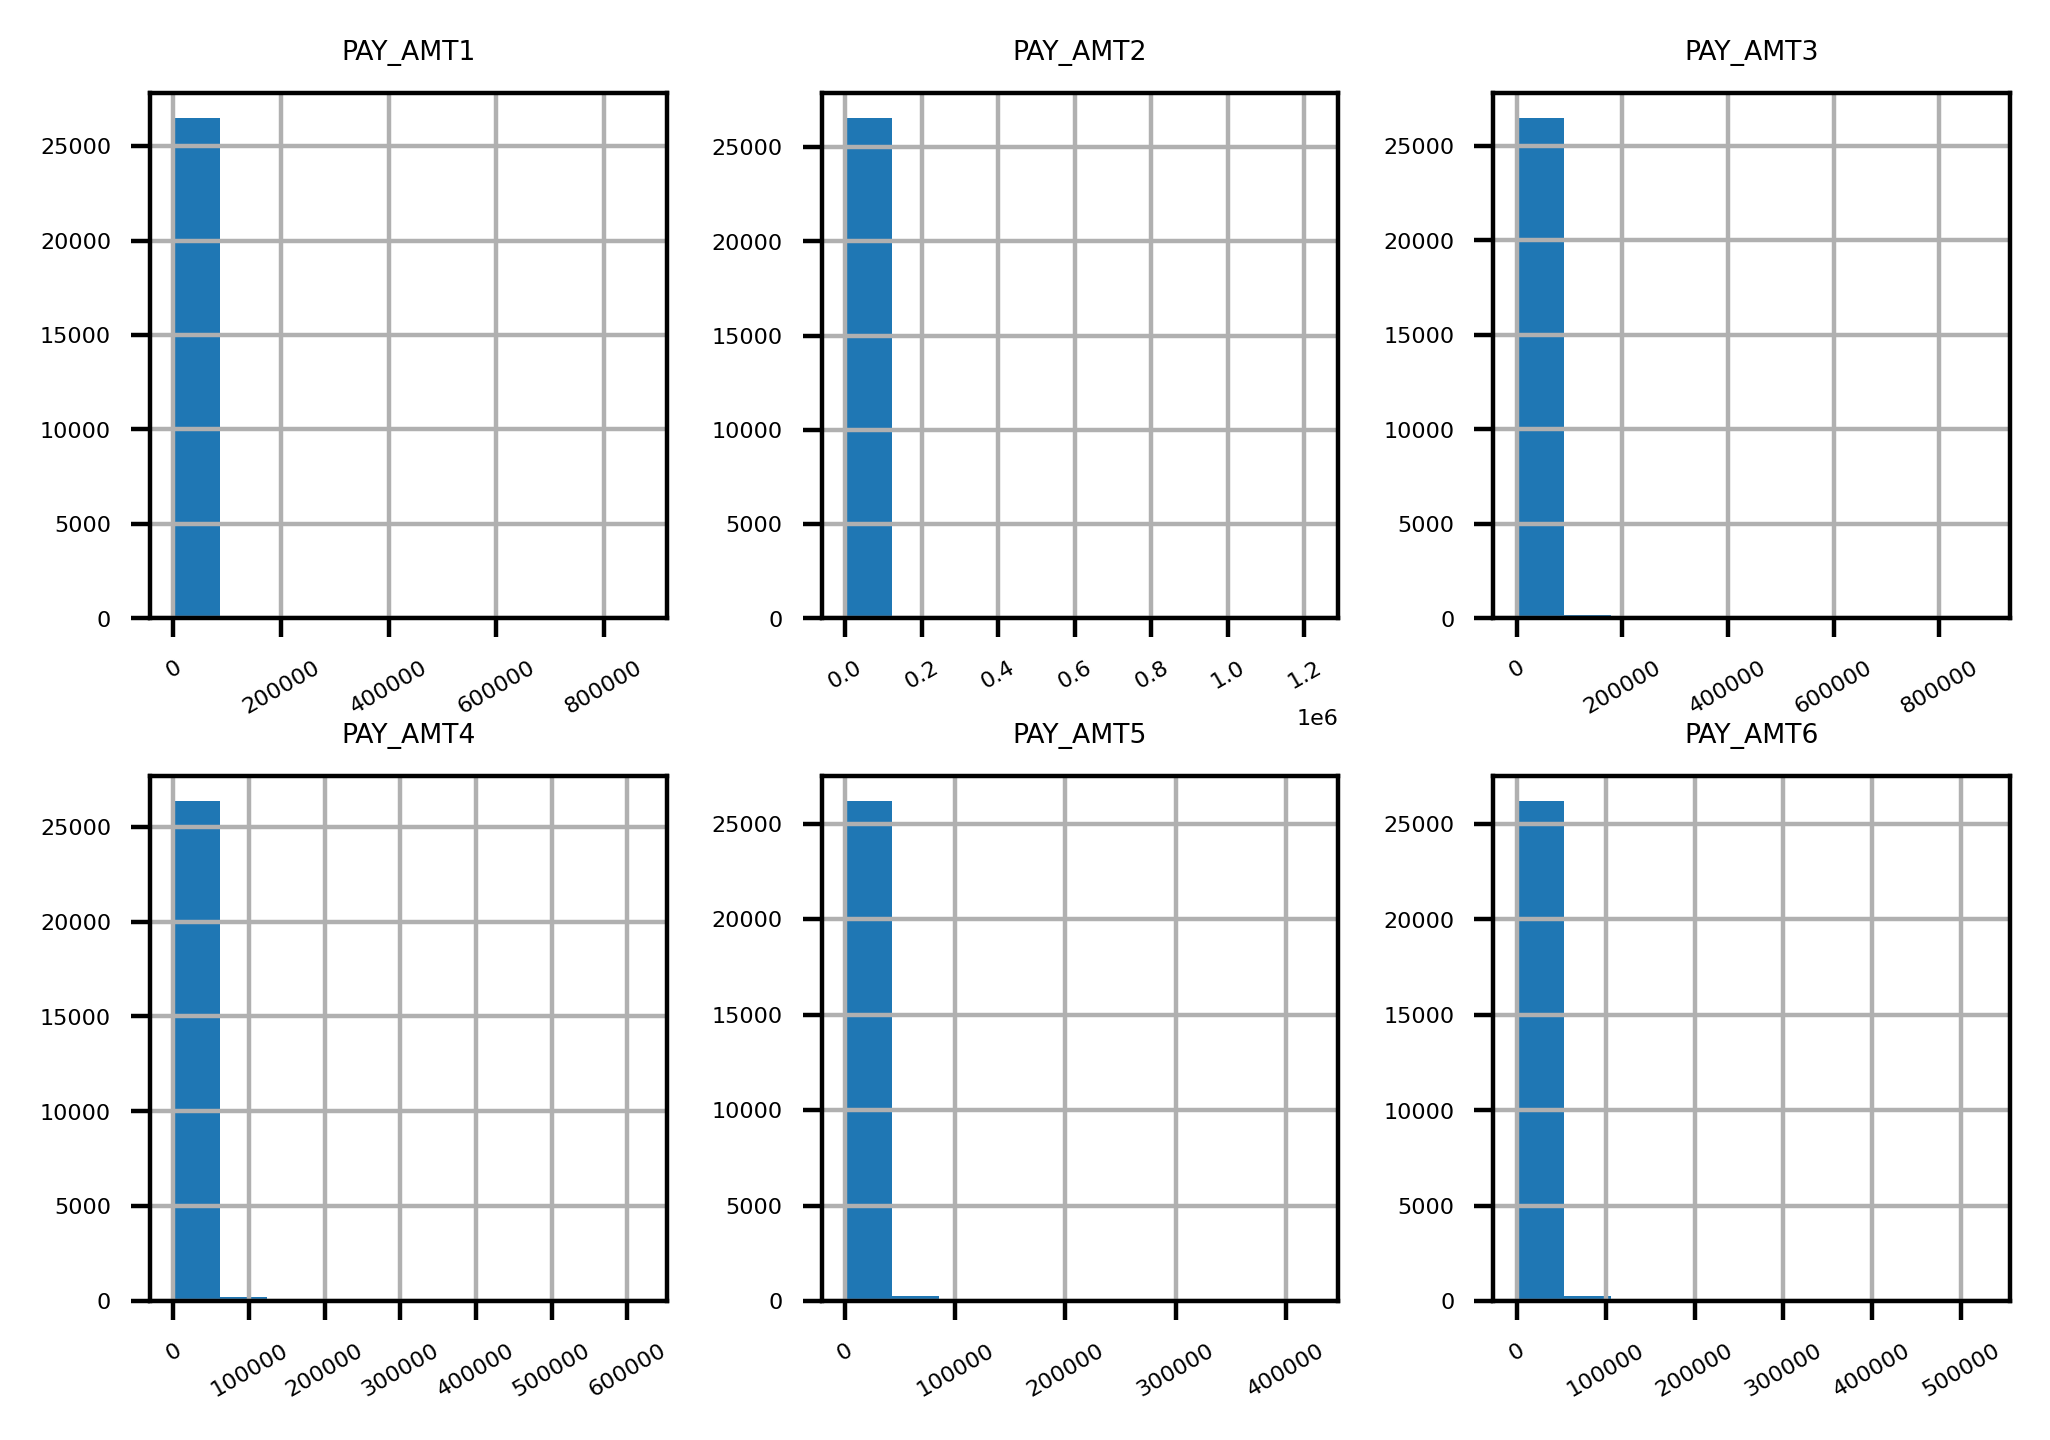

In [122]:
df[pay_amt_feats].hist(layout=(2,3), xrot=30);

In [130]:
# df[pay_amt_feats].hist(layout=(2,3))
# assim os rótulos ficam sobrespostos em cima do outro

__6 - Use uma máscara booleana para ver quantos dos dados de valor do pagamento são exatamente iguais a zero.__

In [124]:
pay_zero_mask = df[pay_amt_feats] == 0
pay_zero_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [126]:
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

__7- Ignorando os pagamentos iguais a zero, usando a máscara que criou na etapa anterior, utilize o método .apply() do pandas e o método np.log10() do Numpy para plotar histogramas de transformações logarítimicas dos pagamentos diferentes de zero.__

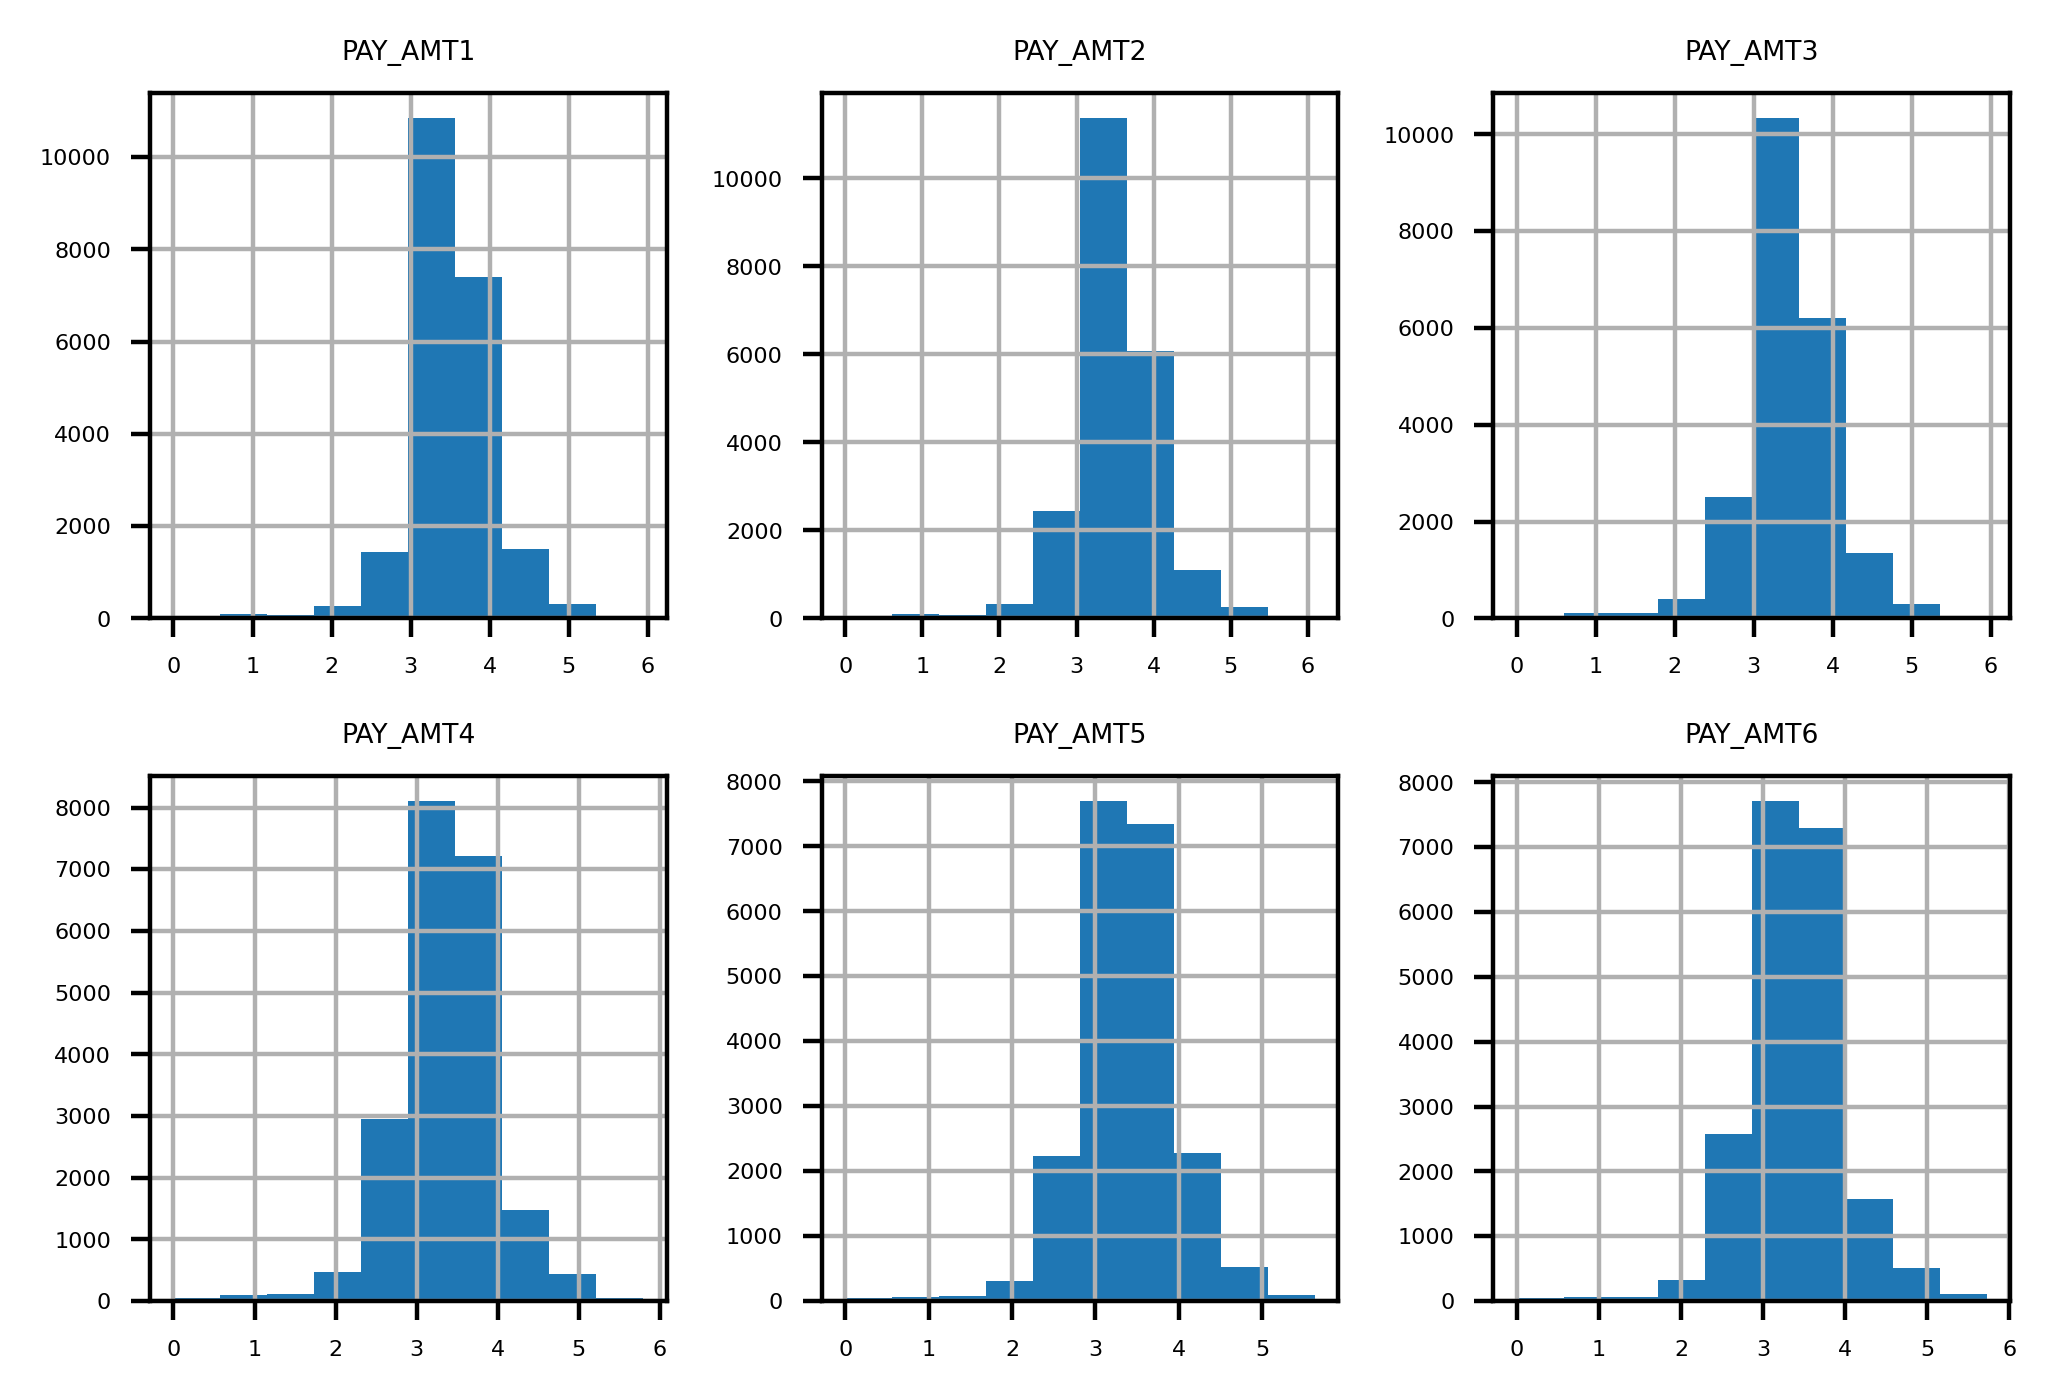

In [131]:
df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3));